## Multiple Linear Regression (Not MultiVariate Regression)

Now, we will make Linear Regression much more faster and powerful.

Let's start by looking at the version of linear regression that look at not just one feature, but a lot of different features.

### Multiple Features (or Variables)
- #### Now, we will introduce $x_j$ as the $j^{th}$ feature or variable in our list of features or variables.
- #### $n$ - Total no. of features or variables.
- #### $\vec{x}^{(i)}$ - All $x_j$ ( j from 1 to n) features of $i^{(th)}$ training example.
    - #### $\vec{x}^{(i)} = [x_1^{(i)}, x_2^{(i)}, ~...~ x_n^{(i)}]$ - This is usually called a **Row Vector** rather than a **Column Vector**.

---

### Model
- #### Previously - $f_{(w, b)}(x) = wx + b$
- #### Now - $$f_{(\vec{w}, b)}(\vec{x}) = w_1x_1 + w_2x_2 + w_3x_3 ~+~ ... ~+~ w_nx_n + b$$
    - #### $b~$ It is called the `Base Parameter`, i.e. when all other input features are zero. This will be our Model's value. It is not a Vector.
    - #### $\vec{w} = [w_1,~ w_2,~ w_3,~~ ...~ w_n]~$ This is a **Vector** or more specifically a **Row Vector**.
    - #### Above two are the **Parameters of the Model**.
- #### New Model can be Rewritten as - $$f_{(\vec{w}, b)}(\vec{x}) = \vec{w} \cdot \vec{x} + b$$

---

## Vectorization

##### It helps in implementing Multiple Linear Regression in Machine Learning. 
##### When you're implementing a learning algorithm, using vectorization will both make your code shorter and also make it run much more efficiently.

##### Here's an example with parameters w and b, where;
    
- $\vec{w} = [w_1, w_2, w_3]$
- $\vec{x} = [x_1, x_2, x_3]$
- $b$ is a number
- $n = 3$

#### Defining, above parameters in python;
```python
w = np.array([1.0, 25, -3.3])
b = 4
x = np.array([10, 20, 30])
```

#### Without Vectorization
$$f_{(\vec{w}, b)}(\vec{x}) = w_1x_1 + w_2x_2 + w_3x_3 + b$$
-
- ##### Without vectorization, above equation in python would look like as;
```python
f = w[0] * x[0] + 
    w[1] * x[1] + 
    w[2] * x[2] + b
```
- ##### This will cause issues when $n$ is large.

#### With Vectorization
- ##### Above equation can be written using vectors as given below.
$$
f_{\vec{w}, b}(\vec{x}) = \vec{w} \cdot \vec{x} + b
$$

- Defining, above in python;
    - ```python
      f = np.dot(w, x) + b
      ```
- ##### This would run much faster than other previous examples. This is also practically possible when $n$ is large.

---
### Let's implement Multiple Linear Regression with Vectorization
- #### Parameters
    - #### $\vec{w} = (w_1, w_2,~ ...~w_n)~$ Vector
    - #### $b~$ Scalar
 - #### Model
     - #### $f_{(\vec{w}, b)}(\vec{x}) = \vec{w} \cdot \vec{x} + b$
 - #### Cost Function
     - #### $J(\vec{w}, b)$
 - #### Gradient Descent
     - #### repeat { <br><div style="padding-left: 20px;"> $w_j = w_j - \alpha \frac{\partial J(\vec{w}, b)}{\partial w_j}$ </div> <br><div style="padding-left: 20px;"> $b = b - \alpha \frac{\partial J(\vec{w}, b)}{\partial b}$ </div> <br>}

<h4>
Gradient Descent becomes just a little bit different with multiple features compared to just one feature.
</h4>

|                     <h2>One Feature</h2>                   |           <h2>$n~$ Features ($~n \geq 2~$)</h2>            |
| :----------------------------------------------------------: | ---------------------------------------------------------- |
| <img width="70%" src="http://localhost:8888/files/Supervised%20Models/Regression/Assets/gradient_descent_single_LR.png?_xsrf=2%7C9a187810%7Cce664c5d0ea99f104da27a491ca0227f%7C1720535697"> | <img width="70%" src="http://localhost:8888/files/Supervised%20Models/Regression/Assets/gradient_descent_multiple_LR.png?_xsrf=2%7C9a187810%7Cce664c5d0ea99f104da27a491ca0227f%7C1720535697"> |

<h4>
    That's it for gradient descent for multiple regression.
</h4>

---
## An Alternative to Gradient Descent
##### There is an alternative way for finding w and b for linear regression. This method is called the normal equation. Whereas it turns out gradient descent is a great method for minimizing the cost function J to find w and b, there is one other algorithm that works only for linear regression and pretty much none of the other algorithms you see in Machine Learning for solving for w and b and this other method does not need an iterative gradient descent algorithm.

#### Normal Equation
- ##### Only for Linear Regression
- ##### Solve for $w,~ b~$ without iterations
- ##### Disadvantages
    - ##### Doesn't generalize to other learning algorithms such as logistic regression algorithm or the neural networks or others.
    - ##### Slow when $n~$ i.e. no. of features is large (> 10000)
- ##### Normal equation methods may be used in machine learning libraries that implement linear regression
- #### Gradient Descent is the recommended method for finding parameters $w$ and $b$.

---

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import fetch_california_housing

# Let's try a Multiple Linear Regression Example

California Housing dataset
--------------------------

### Data Set Characteristics:

- Number of Instances: 20640

- Number of Attributes: 8 numeric, predictive attributes and the target

- Attribute Information:
    - MedInc
        - median income in block group
    - HouseAge
        - median house age in block group
    - AveRooms
        - average number of rooms per household
    - AveBedrms
        - average number of bedrooms per household
    - Population
        - block group population
    - AveOccup
        - average number of household members
    - Latitude
        - block group latitude
    - Longitude
        - block group longitude

- The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

- This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bureau publishes sample data (a block group typically has a population
of 600 to 3,000 people).

- A household is a group of people residing within a home. Since the average
number of rooms and bedrooms in this dataset are provided per household, these
columns may take surprisingly large values for block groups with few households
and many empty houses, such as vacation resorts.

> ### Here, I am starting a 2 variable Linear Regression with above dataset with $x_1~$ as *MedInc*, $x_2~$ as *HouseAge* and $y~$ as *Median House Value*.

In [57]:
# Get Dataset in 'Bunch' Type Data
houses = fetch_california_housing()

# Convert *Bunch* Data to DataFrame Pandas
data_df = pd.DataFrame(data=houses.data, columns=houses.feature_names)

# Add the target column i.e. Median House Value to the DataFrame
data_df['TargetHouseVal'] = houses.target
data_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TargetHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


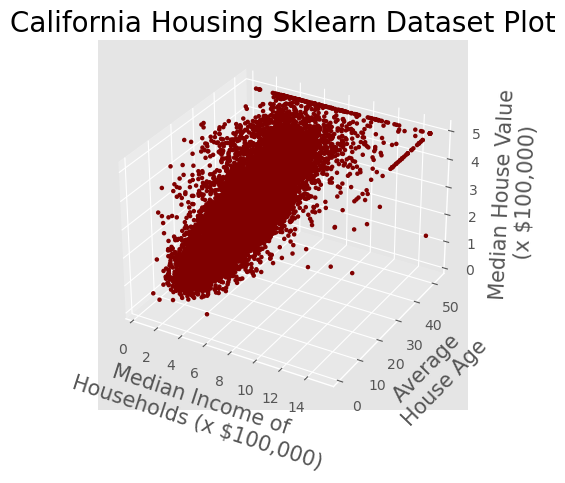

In [58]:
# Plotting Traing and Testing Data for Visualisation Purpose
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

plt.style.use('ggplot')
x = data_df['MedInc']
y = data_df['HouseAge']
z = data_df['TargetHouseVal']
ax.scatter(x, y, z, marker='.', alpha=1, color='maroon', linestyle = 'solid', linewidth = 1)

ax.set_xlabel('\nMedian Income of \nHouseholds (x $100,000)', fontdict = {"fontsize": 15, "fontname": "Sans Serif"})
ax.set_ylabel('\nAverage \nHouse Age', fontdict = {"fontsize": 15, "fontname": "Sans Serif"})
ax.set_zlabel('\nMedian House Value \n(x $100,000)', fontdict = {"fontsize": 15, "fontname": "Sans Serif"})
plt.title("California Housing Sklearn Dataset Plot", fontdict = {"fontsize": 20, "weight": "medium", "fontname": "Sans Serif"})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [59]:
# Calculating size of Whole Dataset
shape = data_df.shape # (20640, 9)

# No. of Training Data Rows
training_rows = int(shape[0] * 0.8) # 16512

# No. of Testing Data Rows
testing_rows = shape[0] - training_rows # 20640 - 16512 = 4128

# We have divided the whole dataset into Training (80%) and Testing (20%)
training_data = data_df.iloc[:training_rows]
testing_data = data_df.iloc[training_rows:]

In [60]:
training_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TargetHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
16507,4.4213,11.0,7.345936,1.132325,1605.0,3.034026,37.74,-121.11,1.827
16508,3.3578,35.0,5.450000,0.973529,958.0,2.817647,37.80,-121.10,1.490
16509,4.1833,22.0,6.564232,1.035264,1252.0,3.153652,37.76,-121.11,1.921
16510,3.4426,7.0,5.416393,1.028415,3006.0,3.285246,37.73,-121.16,1.390


In [61]:
testing_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TargetHouseVal
16512,2.6368,34.0,5.769022,1.051630,1310.0,3.559783,37.72,-121.22,1.656
16513,3.6378,17.0,5.432075,1.022642,1802.0,3.400000,37.81,-121.22,1.261
16514,2.1186,28.0,4.707581,1.039711,1719.0,3.102888,37.80,-121.22,0.944
16515,2.1250,37.0,4.919431,1.052133,521.0,2.469194,37.80,-121.22,0.919
16516,2.9950,18.0,4.750988,0.984190,1531.0,3.025692,37.81,-121.21,1.243
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### Mathematical Formulae Used
<h5>
    
- Partial Derivative of $J(\vec{w}, b)$ wrt $\vec{w}$ keeping $b$ constant

    - From $j = 1$, $$ \frac{\partial J(\vec{w}, b)}{\partial w_1} = \frac{\partial (\frac{1}{2m}\sum_{i = 1}^{m}{(f_{\vec{w}, b}(\vec{x}^{(i)}) - y^{(i)})^{2}})}{\partial w_1} = \frac{1}{m}\sum_{i = 1}^{m}{(f_{\vec{w}, b}(\vec{x}^{(i)}) - y^{(i)})x_1^{(i)}} $$
    - .
    - .
    - .
      
    - Till $j = n$, $$ \frac{\partial J(\vec{w}, b)}{\partial w_n} = \frac{\partial (\frac{1}{2m}\sum_{i = 1}^{m}{(f_{\vec{w}, b}(\vec{x}^{(i)}) - y^{(i)})^{2}})}{\partial w_n} = \frac{1}{m}\sum_{i = 1}^{m}{(f_{\vec{w}, b}(\vec{x}^{(i)}) - y^{(i)})x_n^{(i)}} $$


- Partial Derivative of $J(\vec{w}, b)$ wrt $b$ keeping $\vec{w}$ constant

    - $$\frac{\partial J(\vec{w}, b)}{\partial b} = \frac{\partial (\frac{1}{2m}\sum_{i = 1}^{m}{(f_{\vec{w}, b}(\vec{x}^{(i)}) - y^{(i)})^{2}})}{\partial b} = \frac{1}{m}\sum_{i = 1}^{m}{(f_{\vec{w}, b}(\vec{x}^{(i)}) - y^{(i)})} $$

- In our Housing Dataset, $m = 16512~$ and $n = 2$
</h5>

In [62]:
# m is no. of training examples
m = training_rows

# Defing x and y
x = training_data[['MedInc', 'HouseAge']].to_numpy()
y = training_data['TargetHouseVal'].to_numpy()
y = y.reshape(-1, 1)

# Defining Cost Function
def Cost_Function(w: np.ndarray, b: float):
    # Reshape w to (2, 1) if needed
    w = w.reshape(-1, 1)
    
    # Calculate predictions and cost
    predictions = np.dot(x, w) + b
    error = predictions - y
    cost = np.sum(np.square(error)) / (2 * m)
    
    return cost

#  Defining Partial Derivative Function of J wrt w_i and constant b
def PartialDerivative_J_wi(w: np.ndarray, b: float, i: int):
    # Reshape w to (2, 1) if needed
    w = w.reshape(-1, 1)
    
    # Calculate predictions and error
    predictions = np.dot(x, w) + b
    error = predictions - y
    
    # Calculate the partial derivative with respect to w_i
    derivative = np.sum(error * x[:, i].reshape(-1, 1)) / m
    
    return derivative

#  Defining Partial Derivative Function of J wrt b and constant w
def PartialDerivative_J_b(w: np.ndarray, b: float):
    # Reshape w to (2, 1) if needed
    w = w.reshape(-1, 1)
    
    # Calculate predictions and error
    predictions = np.dot(x, w) + b
    error = predictions - y
    
    # Calculate the partial derivative with respect to w_i
    derivative = np.sum(error) / m
    
    return derivative

#### Now Let's plot the Cost Function $J(\vec{w}, b)$ with $w_1$, $w_2$ and $b$.

In [63]:
# Values for w in Contour Plot
w_1 = np.linspace(-50, 50, 16512)
w_2 = np.linspace(-50, 50, 16512)
W = np.stack((w_1, w_2)).transpose()

# Values for b in Contour Plot
B = np.linspace(-10, 10, 16512)

# Computing Cost Function J
J = np.array([Cost_Function(W[i], B[i]) for i in range(m)])

#### Below is a 4-D Plot with variables as $w_1$, $w_2$, $b$ and $J(\vec{w}, b)$.
<h4>
    
- X - axis is $w_1$
  
- Y - axix is $w_2$

- Z - axis is Cost Function $J(\vec{w}, b)$

- Color Map defines the $b$ parameter data.
</h4>

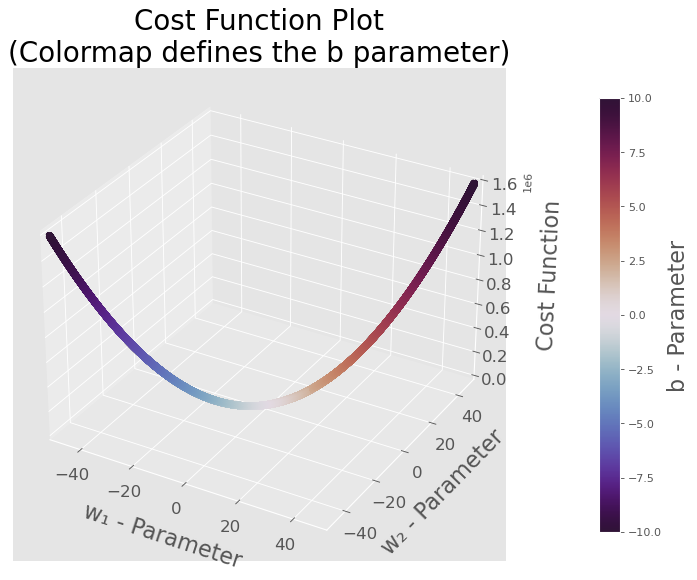

In [64]:
# Plotting Contour Plot
plt.style.use('ggplot')
fig = plt.figure(figsize=(10, 8), dpi=80)
ax = fig.add_subplot(111, projection='3d')

plt.grid(True)
plt.rcParams['axes.grid'] = False

img = ax.scatter(w_1, w_2, J, c=B, cmap=cm.twilight_shifted, alpha=1, marker='X', linestyle='solid', linewidth=2)
ax.set(xlim=(-50, 50), ylim=(-50, 50), zlim=(0, 1600000))

plt.grid(True)
ax.set_xlabel('\nw₁ - Parameter', fontdict = {"fontsize": 20, "fontname": "Sans Serif"})
ax.set_ylabel('\nw₂ - Parameter', fontdict = {"fontsize": 20, "fontname": "Sans Serif"})
ax.set_zlabel('\n\nCost Function', fontdict = {"fontsize": 20, "fontname": "Sans Serif"})
plt.title("Cost Function Plot\n(Colormap defines the b parameter)", fontdict = {"fontsize": 25, "weight": "medium", "fontname": "Sans Serif"})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.zaxis.set_tick_params(labelsize=15)
bar = fig.colorbar(img, pad=0.15, fraction=0.035)
bar.set_label('b - Parameter', size=20)
plt.show()

#### Here, we have taken $\alpha$ or Learning Rate as 0.001, which is a proper fit for our dataset.

Iteration 1000: w1 - 0.009108426048751759, w2 - 0.0608827056455911, b - 0.00202067031310562, J(w, b) - 0.8483742893920281
Iteration 900: w1 - 0.19798136230995989, w2 - 0.03818672325005902, b - 0.020794273270177837, J(w, b) - 0.4695463489395614
Iteration 800: w1 - 0.29702186840048733, w2 - 0.027344903865531792, b - 0.029998598326948844, J(w, b) - 0.3662964865426597
Iteration 700: w1 - 0.34893204281058393, w2 - 0.021681144955299887, b - 0.03417013955847788, J(w, b) - 0.3379955868612047
Iteration 600: w1 - 0.3761726599365053, w2 - 0.018727593849050508, b - 0.03571286587813316, J(w, b) - 0.3302285812902558
Iteration 500: w1 - 0.39050014616119916, w2 - 0.01719252757485927, b - 0.03588501711083225, J(w, b) - 0.32808744422124547
Iteration 400: w1 - 0.398068056629908, w2 - 0.016399833110168585, b - 0.035345135803320306, J(w, b) - 0.32748784052576396
Iteration 300: w1 - 0.40209729087182594, w2 - 0.015995620063676285, b - 0.034437871260342354, J(w, b) - 0.3273107867832625
Iteration 200: w1 - 0.4

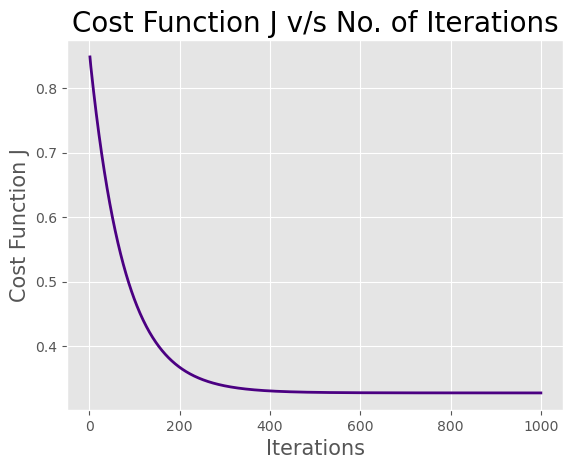

In [69]:
# Total no. of Iterations
iterations = 1000

# Defining Alpha or Learning Rate
alpha = 0.001

# Setting up initial values of w and b
w, b = np.zeros(2), 0

## Cost Function Values for Plotting
costs = np.zeros(1000)

while (iterations != 0):
    # Updating w and b
    temp_w = np.array([PartialDerivative_J_wi(w, b, j) for j in range(len(w))])
    temp_b = PartialDerivative_J_b(w, b)
    w -= alpha * temp_w 
    b -= alpha * temp_b

    # Calculating current Cost
    costs[1000 - iterations] = Cost_Function(w, b)

    # Updating iterations Done
    if (iterations % 100 == 0):
        print(f"Iteration {iterations}: w1 - {w[0]}, w2 - {w[1]}, b - {b}, J(w, b) - {costs[1000 - iterations]}")
    iterations-=1

print("Done. \nParameters value found for the best fit Linear Regression Line.")
print(f"Final values for w1 - {w[0]}, w2 - {w[1]}, b - {b}\n")

## Ploting Cost Function J v/s No. of Iterations
plt.style.use("ggplot")
plt.grid(True)
plt.xlabel("Iterations", fontdict = {"fontsize": 15, "fontname": "Sans Serif"})
plt.ylabel("Cost Function J", fontdict = {"fontsize": 15, "fontname": "Sans Serif"})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Cost Function J v/s No. of Iterations", fontdict = {"fontsize": 20, "weight": "medium", "fontname": "Sans Serif"})
plt.plot(np.arange(1, 1001, 1), costs, alpha = 1, linestyle = 'solid', linewidth = 2, color = 'indigo')
plt.show()

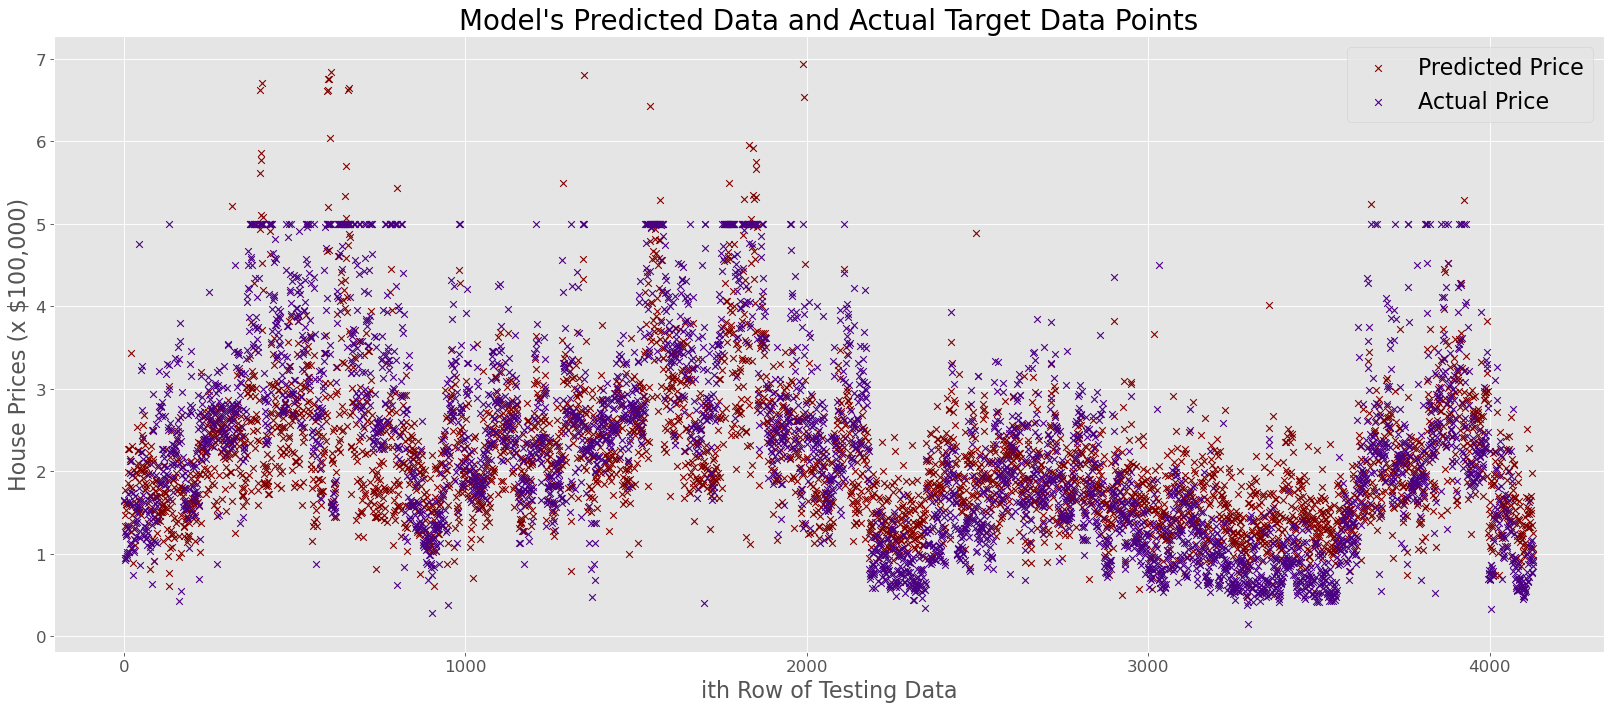

In [85]:
# Regression Line's Y data on Training Data Input Variable X
predictions = np.array([(w[0] * i[0] + w[1] * i[1] + b) for i in testing_data.values])

# Plotting Traing and Testing Data for Visualisation Purpose
## x = np.array(training_data['MedInc'])
## y = np.array(training_data['HouseAge'])
plt.figure(figsize=(25, 10), dpi=80)
targetData = np.array(testing_data['TargetHouseVal'])

plt.style.use("ggplot")
plt.scatter(np.arange(1, 4129, 1), predictions, alpha = 1, linestyle = 'solid', linewidth = 1, marker = 'x', color = 'maroon')
plt.scatter(np.arange(1, 4129, 1), targetData, alpha = 1, linestyle = 'solid', linewidth = 1, marker = 'x', color = 'indigo')
plt.grid(True)
plt.xlabel("ith Row of Testing Data", fontdict = {"fontsize": 20, "fontname": "Sans Serif"})
plt.ylabel("House Prices (x $100,000)", fontdict = {"fontsize": 20, "fontname": "Sans Serif"})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Model's Predicted Data and Actual Target Data Points", fontdict = {"fontsize": 25, "weight": "medium", "fontname": "Sans Serif"})
plt.legend(["Predicted Price", "Actual Price"], loc="upper right", prop={'size': 20})
plt.show()

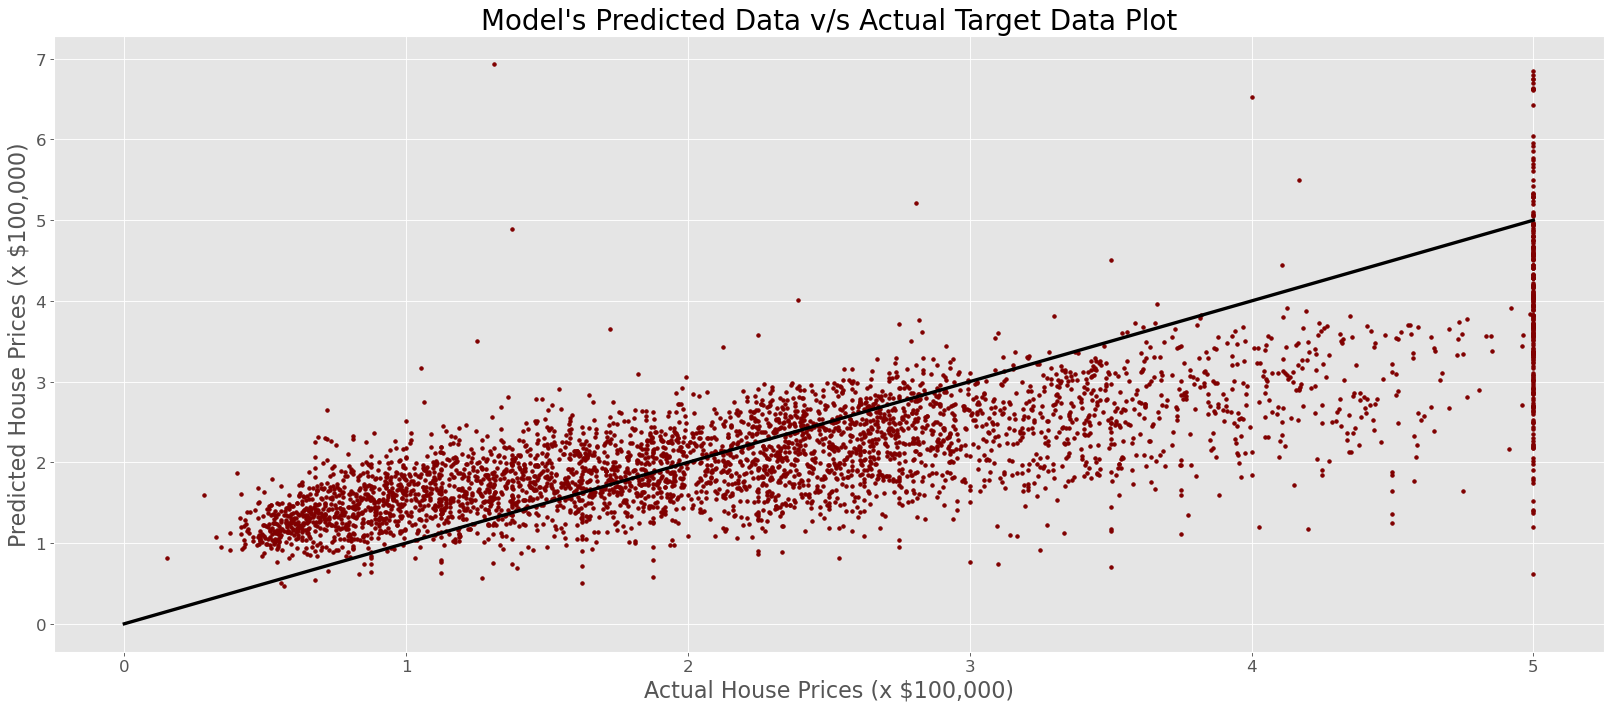

In [70]:
# Regression Line's Y data on Training Data Input Variable X
predictions = np.array([(w[0] * i[0] + w[1] * i[1] + b) for i in testing_data.values])

# Plotting Traing and Testing Data for Visualisation Purpose
## x = np.array(training_data['MedInc'])
## y = np.array(training_data['HouseAge'])
plt.figure(figsize=(25, 10), dpi=80)
targetData = np.array(testing_data['TargetHouseVal'])

plt.style.use("ggplot")
plt.scatter(targetData, predictions, alpha = 1, linestyle = 'solid', linewidth = 1, marker = '.', color = 'maroon')
plt.plot(np.linspace(0, 5, 100), np.linspace(0, 5, 100), alpha = 1, linestyle = 'solid', linewidth = 3, color = 'black')
plt.grid(True)
plt.xlabel("Actual House Prices (x $100,000)", fontdict = {"fontsize": 20, "fontname": "Sans Serif"})
plt.ylabel("Predicted House Prices (x $100,000)", fontdict = {"fontsize": 20, "fontname": "Sans Serif"})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Model's Predicted Data v/s Actual Target Data Plot", fontdict = {"fontsize": 25, "weight": "medium", "fontname": "Sans Serif"})
plt.show()

In [22]:
from sklearn.metrics import r2_score
r2_score(targetData, predictions)

0.5441313850312866

---
<h4> 

We got our Regression Line that fits our data.
Parameters are;
- $w_1 = 0.409$
- $w_2 = 0.016$
- $b = 0.007$

Thus, our model becomes;
$$
y = 0.409 x_1 + 0.016 x_2 + 0.007
$$

where,
- $x_1$ = Median Income of Household
- $x_2$ = Average House Age
- $y$ = Median House Value or Price
</h4>

---

##### Now, here are some techniques to run Gradient Descent much faster.

<h4>

1. Feature Scaling: [Tutorial](https://www.coursera.org/learn/machine-learning/lecture/KMDV3/feature-scaling-part-1)
</h4>

### How to check whether Gradient Descent is converging or not ??
- #### The job of gradient descent is to find parameters w and b that hopefully minimize the cost function J. Plot the cost function J, which is calculated on the training set at each iteration of gradient descent.
- #### Remember that each iteration means after each simultaneous update of the parameters w and b. In this plot, the horizontal axis (x- Axis) is the number of iterations of gradient descent that you've run so far.

> ### See the code cell 11 of this notebook where Cost Function J minimizes as no. of iterations increases.

- #### After plotting, we will get a curve where cost function tends to zero as no. of iterations pass by. This curve is called a **Learning Curve**.